In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.dropna()
df['Unnamed: 32'].tail()
df = df.drop(['Unnamed: 32'], axis =1)

In [3]:
df['diagnosis_'] = df['diagnosis'].values
df = df.drop(['diagnosis', 'id'], axis =1)
df['diagnosis'] = df['diagnosis_'].values
df = df.drop(['diagnosis_'], axis =1)
df.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
from sklearn.preprocessing import Imputer, LabelEncoder

lbl = LabelEncoder()

d = lbl.fit_transform(df.diagnosis.values)


df['diagnosis'] = d

df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [5]:
df.shape

(569, 31)

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, 
                                                  random_state = 42, 
                                                  shuffle=True)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9464461185718964

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


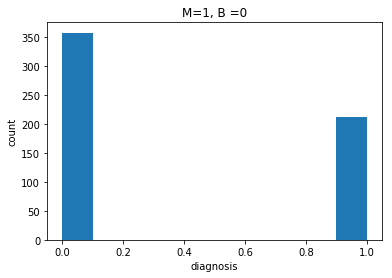

In [9]:
# data visualization
# below shows the amount of the data is belong '0' class.
#also the amount of the data belong to the '1' class.
plt.hist(df['diagnosis'])
plt.title('M=1, B =0')
plt.ylabel('count')
plt.xlabel('diagnosis')
plt.show()

/Users/yongboyu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/yongboyu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


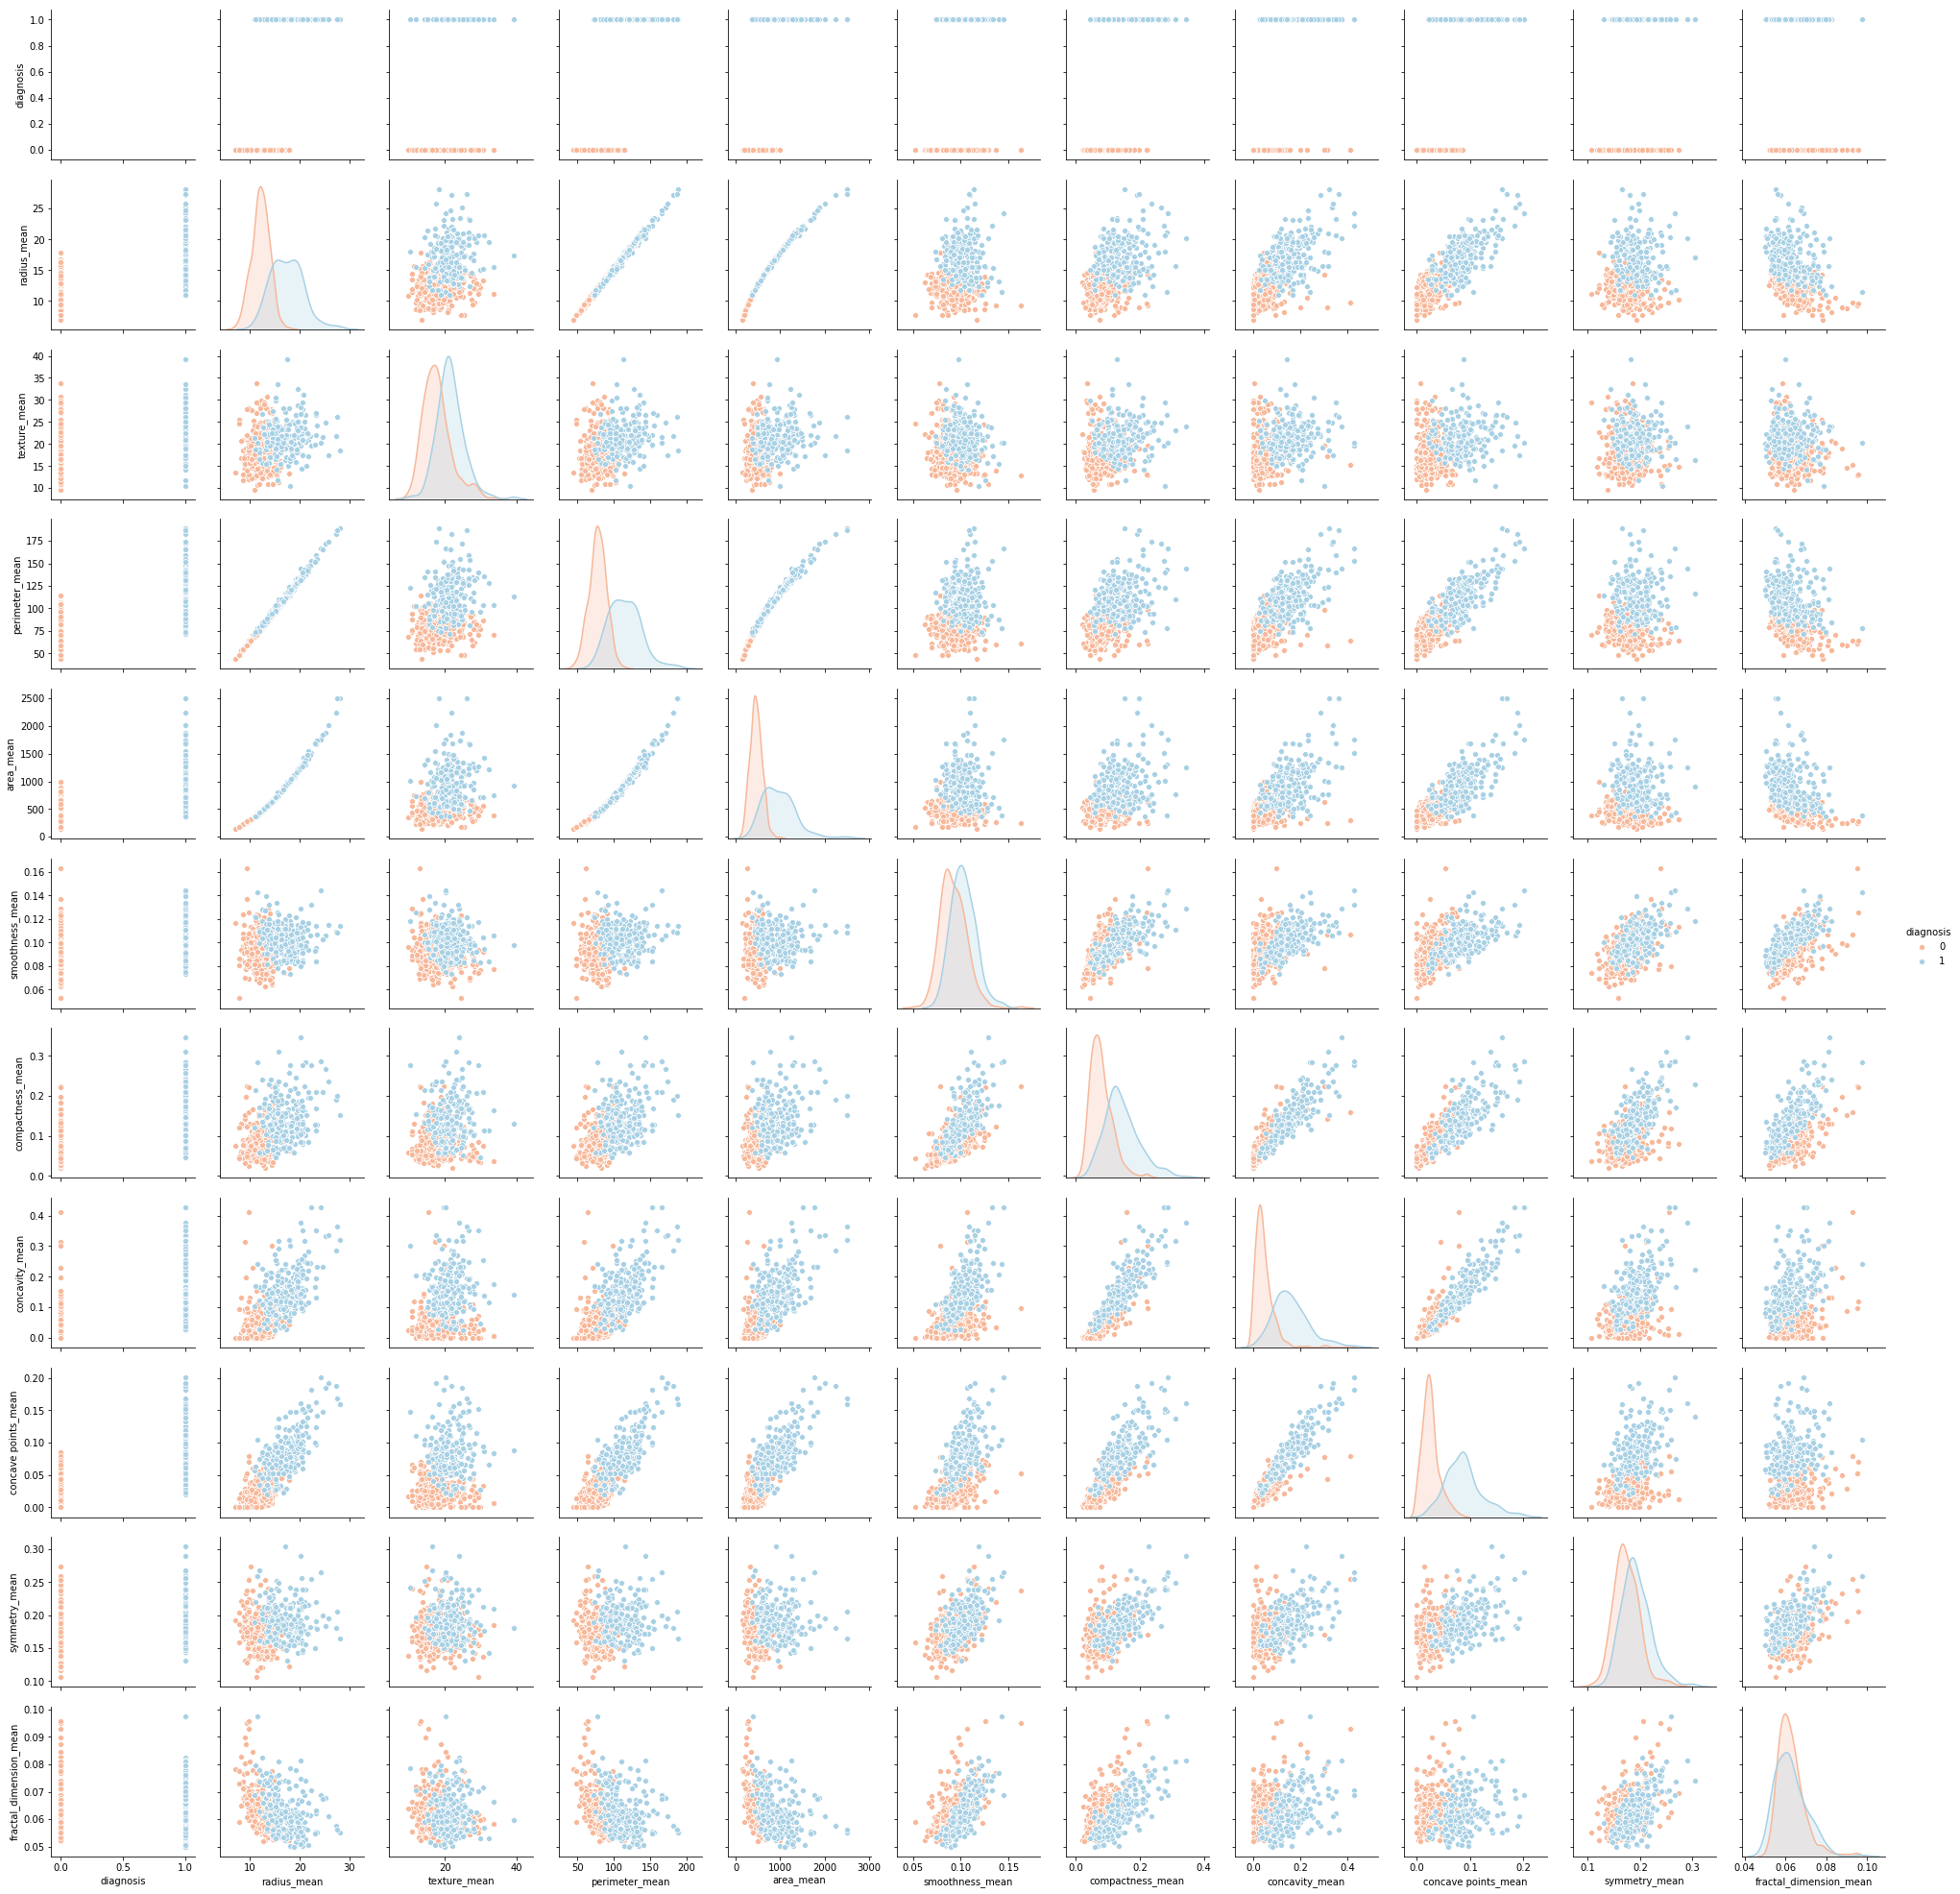

In [10]:
# data visualization

# extract all the mean cols and visulaize it with target
mean_cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data = df[mean_cols], hue = 'diagnosis', palette='RdBu')

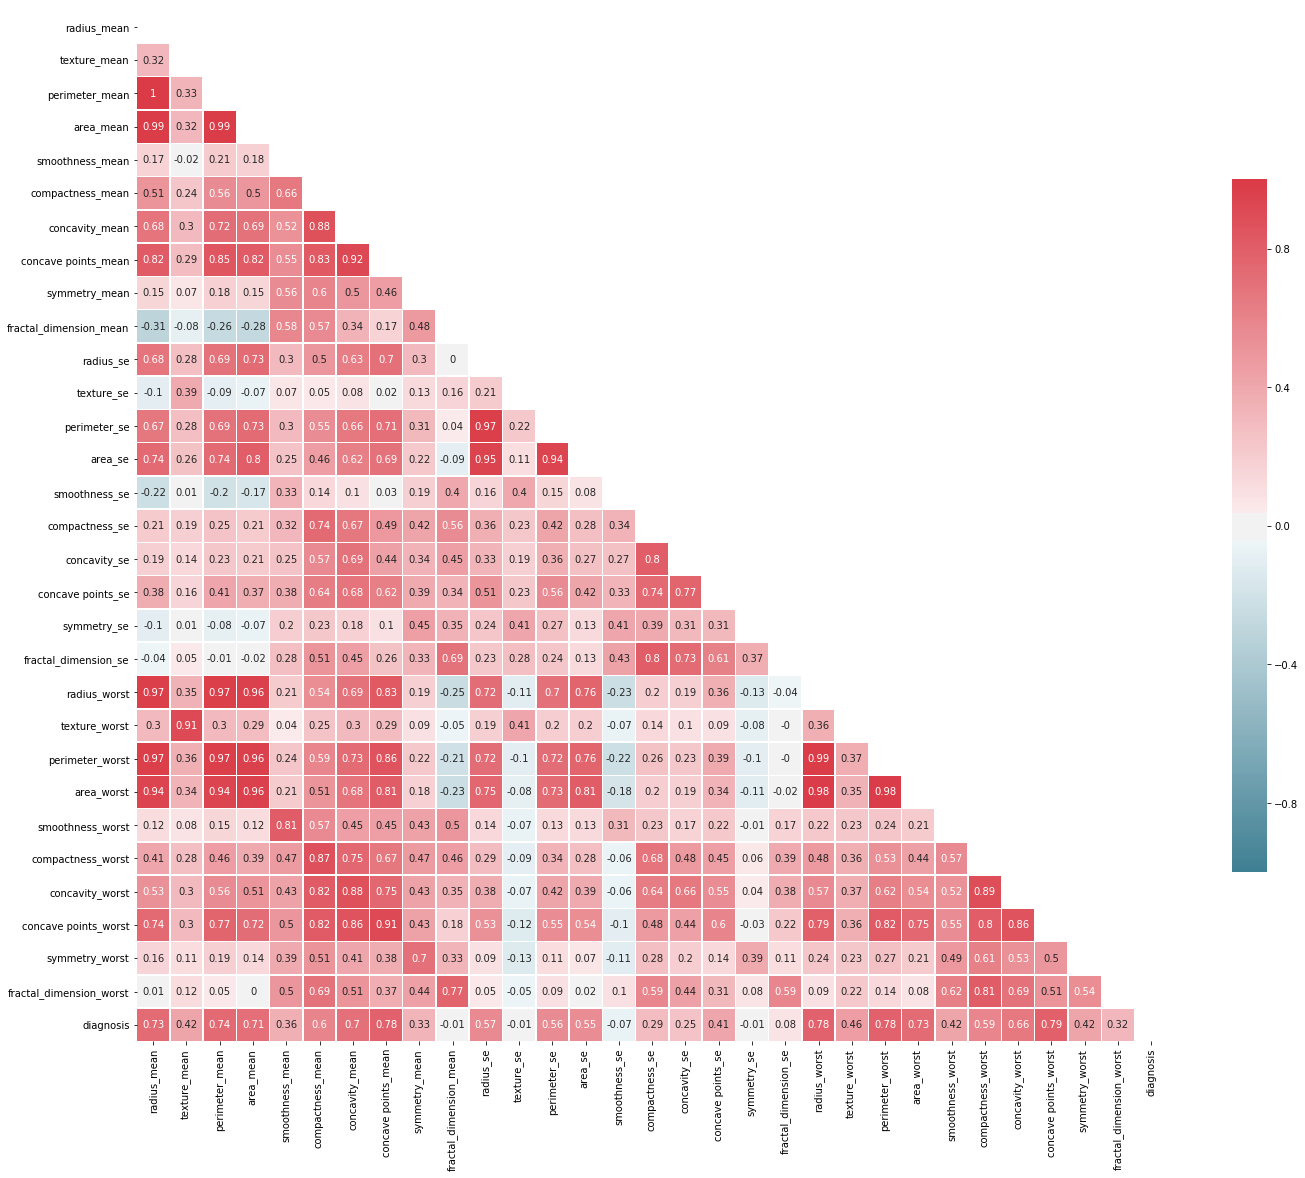

In [11]:
# data visualization
# construct the correlation between features

df_mean = df[mean_cols]
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap= cmap, vmin =-1, vmax=1,
            center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [12]:
# feature selection.
# we can see the 'area_mean' has 0.99 correlate with 'radius_mean', 
#also 'area_mean' has 0.99 correlate with 'perimeter_mean'
# so we can just use one from ['area_mean', 'radius_mean', 'perimeter_mean']
# also between ['radius_worst','area_worst','perimeter_worst']
#['radius_se','area_se','perimeter_se']
df_drop_corr = df.drop(['radius_mean', 'perimeter_mean','area_worst','perimeter_worst','radius_se','area_se'],
                      axis=1)

df_drop_corr.head(2)
X = df_drop_corr.iloc[:,:-1]
y = df_drop_corr.iloc[:, -1]
X_train, X_test,y_train,y_test = train_test_split(X,
                                                  y, 
                                                  test_size= 0.2, 
                                                  random_state = 42, 
                                                  shuffle=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9418604651162791

In [15]:
# PCA dimention reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df_feature = df.iloc[:,:-1]
y = df['diagnosis']
df_scale = scale.fit_transform(df_feature)
pca = PCA(n_components=3)

out = pca.fit_transform(df_scale)
#pca = PCA(n_components=3)
df_pca=pca.fit_transform(out)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size =0.2, shuffle= True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

[[66  3]
 [ 2 43]]


/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


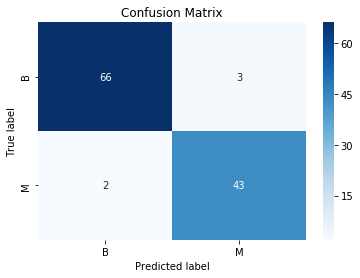

In [16]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

X = df.iloc[:, : -1]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle= True)
#logreg_cv = GridSearchCV(logreg,param_grid , cv=5)

logreg.fit(X_train, y_train)
ConfMatrix = confusion_matrix(y_test,logreg.predict(X_test))
print(ConfMatrix)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="g", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");


In [25]:
# polonomial degree and learning curves
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
# lets just using the mean feutures.
X = df.iloc[:,:10]
y = df['diagnosis']
model = LogisticRegression()
d_range = list(range(1,11))
d_mse_test =[]
d_mse_train = []
for d in d_range:
    poly = PolynomialFeatures(degree=d)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4, random_state=4)
    model.fit(X_, y)
    y_pred = model.predict(X_test)
    
    d_mse_test.append(metrics.mean_squared_error(y_test, y_pred))
    d_mse_train.append(metrics.mean_squared_error(y_train, model.predict(X_train)))

    # plot the values of the accuracy over the training set (overfitted) and over the testing set (better prediciton of the accuracy)


/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yongboyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

Text(0, 0.5, 'Mean Squared Error')

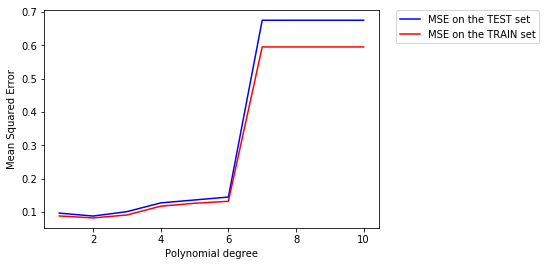

In [26]:
plt.plot(d_range, d_mse_test,'b', label='MSE on the TEST set')
plt.plot(d_range, d_mse_train,'r', label='MSE on the TRAIN set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')